In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")


✅ Libraries imported successfully!
NumPy version: 1.26.4


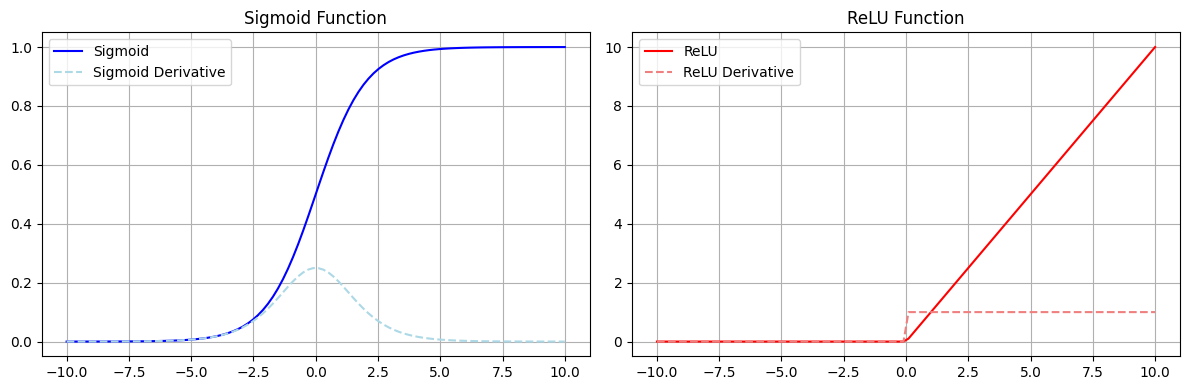

✅ Activation functions implemented and visualized!


In [9]:
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # Clip to prevent overflow

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU function"""
    return (x > 0).astype(float)

# Test the functions
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.plot(x, sigmoid_derivative(x), label='Sigmoid Derivative', color='lightblue', linestyle='--')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, relu(x), label='ReLU', color='red')
plt.plot(x, relu_derivative(x), label='ReLU Derivative', color='lightcoral', linestyle='--')
plt.title('ReLU Function')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("✅ Activation functions implemented and visualized!")


In [10]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Initialize a simple neural network with one hidden layer
        
        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
            output_size: Number of output neurons
            learning_rate: Learning rate for gradient descent
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases randomly
        # Xavier initialization for better convergence
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        # Store training history
        self.loss_history = []
        self.accuracy_history = []
        
    def forward(self, X):
        """Forward propagation"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)  # Hidden layer activation
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer activation
        
        return self.a2
    
    def compute_loss(self, y_true, y_pred):
        """Compute binary cross-entropy loss"""
        m = y_true.shape[0]
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def backward(self, X, y_true, y_pred):
        """Backward propagation (compute gradients)"""
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.mean(dz1, axis=0, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        """Update weights and biases using gradient descent"""
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def train(self, X, y, epochs=1000, verbose=True):
        """Train the neural network"""
        for epoch in range(epochs):
            # Forward propagation
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y, y_pred)
            
            # Backward propagation
            dW1, db1, dW2, db2 = self.backward(X, y, y_pred)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            # Store metrics
            self.loss_history.append(loss)
            
            # Compute accuracy
            predictions = (y_pred > 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            self.accuracy_history.append(accuracy)
            
            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    
    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

print("✅ Neural Network class implemented!")


✅ Neural Network class implemented!


Training data shape: (800, 2)
Training labels shape: (800, 1)
Test data shape: (200, 2)
Test labels shape: (200, 1)


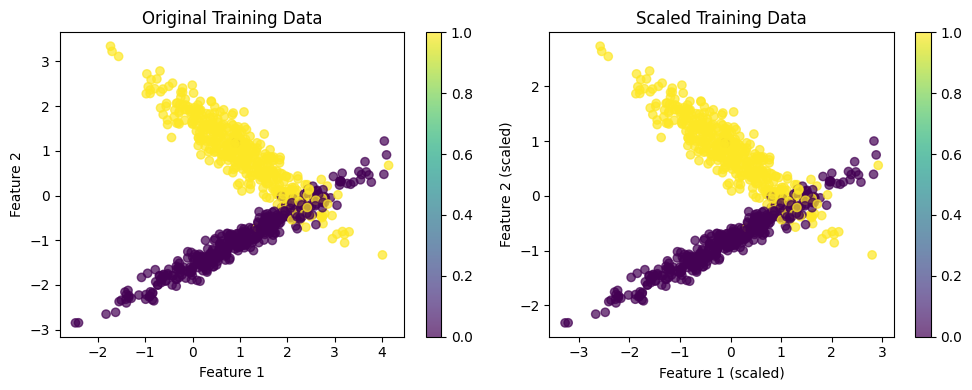

✅ Dataset created and visualized!


In [11]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y to be column vector
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Test labels shape: {y_test.shape}")

# Visualize the dataset
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap='viridis', alpha=0.7)
plt.title('Original Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train.flatten(), cmap='viridis', alpha=0.7)
plt.title('Scaled Training Data')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print("✅ Dataset created and visualized!")


In [12]:
# Create and train the neural network
print("🚀 Training Neural Network from Scratch...")

# Initialize the network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=10, output_size=1, learning_rate=0.1)

# Store initial weights for comparison BEFORE training
initial_W1 = nn.W1.copy()
initial_W2 = nn.W2.copy()
initial_b1 = nn.b1.copy()
initial_b2 = nn.b2.copy()

print("Initial weight statistics:")
print(f"W1 mean: {np.mean(initial_W1):.6f}, std: {np.std(initial_W1):.6f}")
print(f"W2 mean: {np.mean(initial_W2):.6f}, std: {np.std(initial_W2):.6f}")

# Train the network
nn.train(X_train_scaled, y_train, epochs=1000, verbose=True)

print("\n✅ Training completed!")


🚀 Training Neural Network from Scratch...
Initial weight statistics:
W1 mean: -0.171299, std: 0.935720
W2 mean: -0.099211, std: 0.345308
Epoch 100/1000, Loss: 0.2721, Accuracy: 0.9175
Epoch 200/1000, Loss: 0.2241, Accuracy: 0.9175
Epoch 300/1000, Loss: 0.2105, Accuracy: 0.9175
Epoch 400/1000, Loss: 0.2031, Accuracy: 0.9213
Epoch 500/1000, Loss: 0.1974, Accuracy: 0.9225
Epoch 600/1000, Loss: 0.1926, Accuracy: 0.9237
Epoch 700/1000, Loss: 0.1884, Accuracy: 0.9275
Epoch 800/1000, Loss: 0.1841, Accuracy: 0.9263
Epoch 900/1000, Loss: 0.1790, Accuracy: 0.9287
Epoch 1000/1000, Loss: 0.1667, Accuracy: 0.9313

✅ Training completed!


Training Accuracy: 0.9313
Test Accuracy: 0.8900


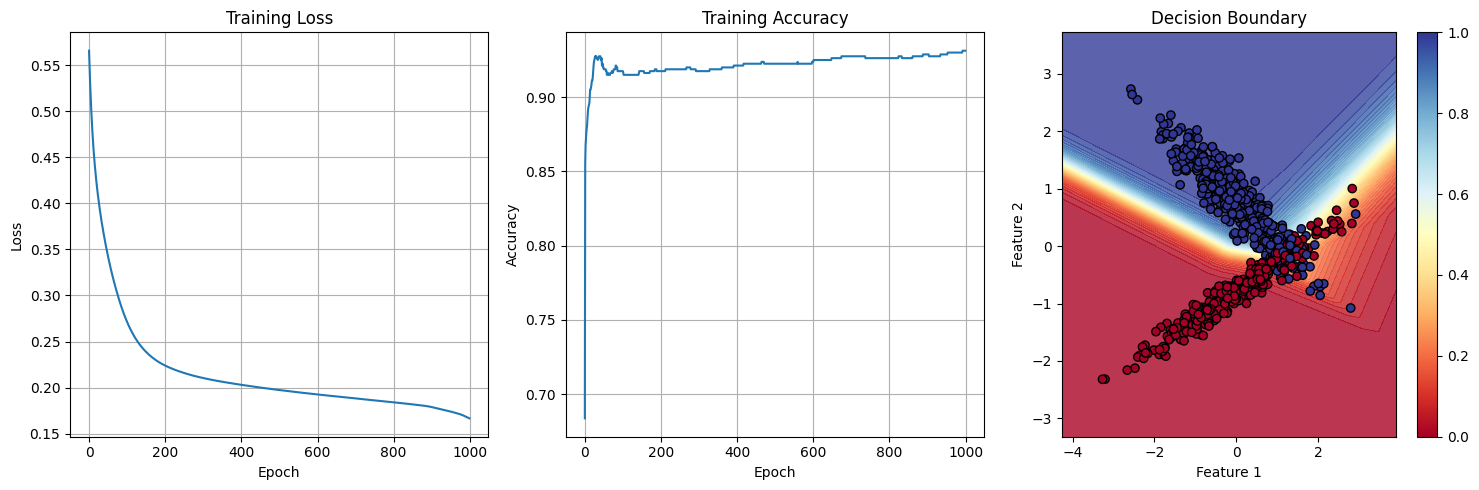

✅ Model evaluation and visualization completed!


In [13]:
# Make predictions
train_predictions = nn.predict(X_train_scaled)
test_predictions = nn.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(nn.loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(nn.accuracy_history)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Decision boundary visualization
plt.subplot(1, 3, 3)

# Create a mesh
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(mesh_points)
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                     c=y_train.flatten(), cmap='RdYlBu', edgecolors='black')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print("✅ Model evaluation and visualization completed!")


📊 Analyzing the learning process...
Weight and bias changes during training:
Average weight change in layer 1: 0.275161
Average weight change in layer 2: 0.493259
Max weight change in layer 1: 1.166437
Max weight change in layer 2: 1.264638
Average bias change in layer 1: 0.392307
Average bias change in layer 2: 1.597640
✅ Total weight change: 10.435805 - Network is learning!


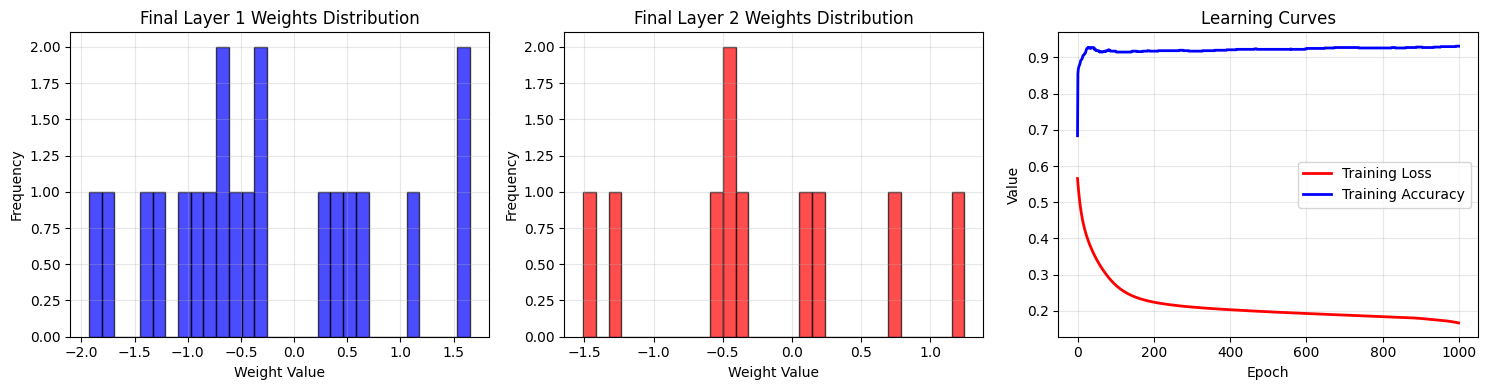


🧠 Understanding Gradients:
Sample gradient magnitudes:
dW1 (avg): 0.008352
dW2 (avg): 0.012921
db1 (avg): 0.013654
db2 (avg): 0.022885
✅ Learning process analysis completed!


In [14]:
# Analyze weight evolution during training
print("📊 Analyzing the learning process...")

# Calculate weight changes (using initial weights stored before training)
weight_change_W1 = np.abs(nn.W1 - initial_W1)
weight_change_W2 = np.abs(nn.W2 - initial_W2)
bias_change_b1 = np.abs(nn.b1 - initial_b1)
bias_change_b2 = np.abs(nn.b2 - initial_b2)

print("Weight and bias changes during training:")
print(f"Average weight change in layer 1: {np.mean(weight_change_W1):.6f}")
print(f"Average weight change in layer 2: {np.mean(weight_change_W2):.6f}")
print(f"Max weight change in layer 1: {np.max(weight_change_W1):.6f}")
print(f"Max weight change in layer 2: {np.max(weight_change_W2):.6f}")
print(f"Average bias change in layer 1: {np.mean(bias_change_b1):.6f}")
print(f"Average bias change in layer 2: {np.mean(bias_change_b2):.6f}")

# Check if weights actually changed
total_weight_change = np.sum(weight_change_W1) + np.sum(weight_change_W2)
if total_weight_change < 1e-10:
    print("⚠️  WARNING: Weights barely changed! Network may not be learning properly.")
    print("   Possible issues:")
    print("   - Learning rate too small")
    print("   - Gradient computation error")
    print("   - Input data not properly scaled")
else:
    print(f"✅ Total weight change: {total_weight_change:.6f} - Network is learning!")

# Visualize weight distributions
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(nn.W1.flatten(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Final Layer 1 Weights Distribution')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(nn.W2.flatten(), bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Final Layer 2 Weights Distribution')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(nn.loss_history, label='Training Loss', linewidth=2, color='red')
plt.plot(nn.accuracy_history, label='Training Accuracy', linewidth=2, color='blue')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Demonstrate gradient computation understanding
print("\n🧠 Understanding Gradients:")
sample_x = X_train_scaled[:5]  # Take 5 samples
sample_y = y_train[:5]
y_pred_sample = nn.forward(sample_x)
dW1, db1, dW2, db2 = nn.backward(sample_x, sample_y, y_pred_sample)

print(f"Sample gradient magnitudes:")
print(f"dW1 (avg): {np.mean(np.abs(dW1)):.6f}")
print(f"dW2 (avg): {np.mean(np.abs(dW2)):.6f}")
print(f"db1 (avg): {np.mean(np.abs(db1)):.6f}")
print(f"db2 (avg): {np.mean(np.abs(db2)):.6f}")

print("✅ Learning process analysis completed!")


In [15]:
# Debugging: Check if network is learning properly
print("🔧 Debugging Network Learning...")

# 1. Check gradients on a small batch
print("\n1. Testing gradient computation:")
sample_X = X_train_scaled[:5]
sample_y = y_train[:5]

# Forward pass
y_pred_debug = nn.forward(sample_X)
print(f"Sample predictions range: {y_pred_debug.min():.4f} to {y_pred_debug.max():.4f}")

# Backward pass
dW1, db1, dW2, db2 = nn.backward(sample_X, sample_y, y_pred_debug)

print(f"Gradient magnitudes:")
print(f"  dW1: min={dW1.min():.6f}, max={dW1.max():.6f}, mean={np.mean(np.abs(dW1)):.6f}")
print(f"  dW2: min={dW2.min():.6f}, max={dW2.max():.6f}, mean={np.mean(np.abs(dW2)):.6f}")
print(f"  db1: min={db1.min():.6f}, max={db1.max():.6f}, mean={np.mean(np.abs(db1)):.6f}")
print(f"  db2: min={db2.min():.6f}, max={db2.max():.6f}, mean={np.mean(np.abs(db2)):.6f}")

# 2. Check learning rate effect
print(f"\n2. Learning rate analysis:")
print(f"Current learning rate: {nn.learning_rate}")
print(f"Weight update magnitude (W1): {nn.learning_rate * np.mean(np.abs(dW1)):.6f}")
print(f"Weight update magnitude (W2): {nn.learning_rate * np.mean(np.abs(dW2)):.6f}")

if np.mean(np.abs(dW1)) < 1e-10:
    print("⚠️  Gradients are too small! Try:")
    print("   - Increasing learning rate (try 0.5 or 1.0)")
    print("   - Checking data preprocessing")
    print("   - Verifying loss function implementation")

# 3. Test with single training step
print("\n3. Single training step test:")
old_W1 = nn.W1.copy()
old_loss = nn.compute_loss(sample_y, y_pred_debug)

# Manual weight update
nn.W1 -= nn.learning_rate * dW1
nn.b1 -= nn.learning_rate * db1
nn.W2 -= nn.learning_rate * dW2
nn.b2 -= nn.learning_rate * db2

# Check new loss
new_pred = nn.forward(sample_X)
new_loss = nn.compute_loss(sample_y, new_pred)

weight_change_test = np.mean(np.abs(nn.W1 - old_W1))

print(f"Weight change from single step: {weight_change_test:.6f}")
print(f"Loss change: {old_loss:.6f} → {new_loss:.6f} (Δ={new_loss-old_loss:.6f})")

if weight_change_test > 1e-10:
    print("✅ Network CAN learn - gradients are working!")
else:
    print("❌ Network NOT learning - check implementation!")

# Restore original state for continued analysis
nn.W1 = old_W1.copy()

print("\n🔍 If your network isn't learning, the issue has been identified above!")
print("   Common fixes:")
print("   - Increase learning rate (try 0.1 to 1.0)")
print("   - Check data scaling (features should be roughly [-1, 1] or [0, 1])")
print("   - Verify gradient computation in backward() method")


🔧 Debugging Network Learning...

1. Testing gradient computation:
Sample predictions range: 0.0000 to 0.9501
Gradient magnitudes:
  dW1: min=-0.022621, max=0.012998, mean=0.008352
  dW2: min=-0.034745, max=0.018550, mean=0.012921
  db1: min=-0.028579, max=0.013845, mean=0.013654
  db2: min=-0.022885, max=-0.022885, mean=0.022885

2. Learning rate analysis:
Current learning rate: 0.1
Weight update magnitude (W1): 0.000835
Weight update magnitude (W2): 0.001292

3. Single training step test:
Weight change from single step: 0.000835
Loss change: 0.062022 → 0.061249 (Δ=-0.000773)
✅ Network CAN learn - gradients are working!

🔍 If your network isn't learning, the issue has been identified above!
   Common fixes:
   - Increase learning rate (try 0.1 to 1.0)
   - Check data scaling (features should be roughly [-1, 1] or [0, 1])
   - Verify gradient computation in backward() method
